In [2]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("IPL Matches 2008-2020.csv")

In [5]:
data.head(-5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,1216542,Dubai,2020-10-08,JM Bairstow,Dubai International Cricket Stadium,0,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,69.0,N,NaN,AK Chaudhary,Nitin Menon
807,1216543,Dubai,2020-10-14,A Nortje,Dubai International Cricket Stadium,0,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,Delhi Capitals,runs,13.0,N,NaN,AK Chaudhary,Nitin Menon
808,1216544,Dubai,2020-10-25,RD Gaikwad,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,Chennai Super Kings,wickets,8.0,N,NaN,C Shamshuddin,RK Illingworth
809,1216545,Abu Dhabi,2020-09-26,Shubman Gill,Sheikh Zayed Stadium,0,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,7.0,N,NaN,CB Gaffaney,VK Sharma


In [6]:
data.info

<bound method DataFrame.info of           id        city        date player_of_match  \
0     335982   Bangalore  2008-04-18     BB McCullum   
1     335983  Chandigarh  2008-04-19      MEK Hussey   
2     335984       Delhi  2008-04-19     MF Maharoof   
3     335985      Mumbai  2008-04-20      MV Boucher   
4     335986     Kolkata  2008-04-20       DJ Hussey   
..       ...         ...         ...             ...   
811  1216547       Dubai  2020-09-28  AB de Villiers   
812  1237177       Dubai  2020-11-05       JJ Bumrah   
813  1237178   Abu Dhabi  2020-11-06   KS Williamson   
814  1237180   Abu Dhabi  2020-11-08      MP Stoinis   
815  1237181       Dubai  2020-11-10        TA Boult   

                                          venue  neutral_venue  \
0                         M Chinnaswamy Stadium              0   
1    Punjab Cricket Association Stadium, Mohali              0   
2                              Feroz Shah Kotla              0   
3                              

### Most Wins in IPL

Winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


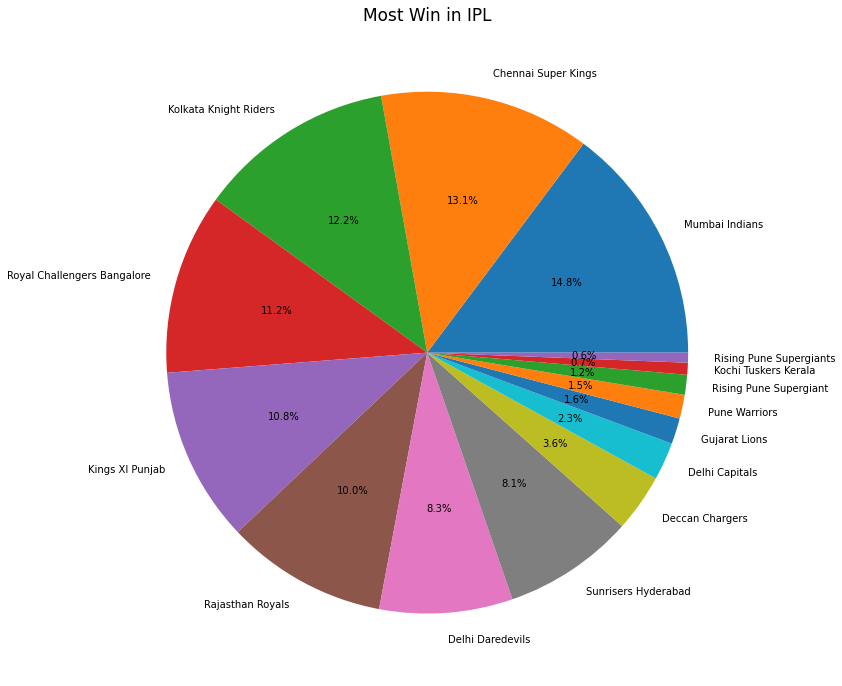

In [25]:
temp = pd.DataFrame({"Winner": data['winner']})
count_wins = temp.value_counts()
print(count_wins)
labels = [x[0] for x in count_wins.keys()]
labels

bar , ax = plt.subplots(figsize=(20,12))
ax = plt.pie(x = count_wins, autopct = "%.1f%%" ,labels= labels)
plt.title("Most Win in IPL", fontsize =  17)
plt.show()

### Most wins in Eliminator

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


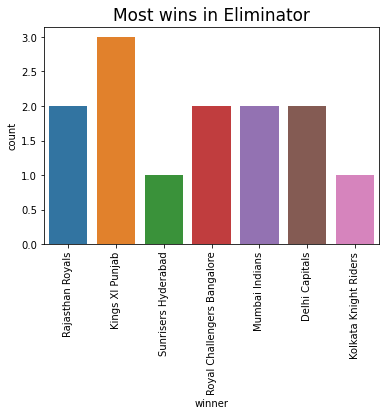

In [28]:
sns.countplot(data[ 'winner' ][data[ 'eliminator' ]=='Y'], data = data)
plt.title("Most wins in Eliminator", fontsize = 17)
plt.xticks(rotation = 90)
plt.show()

### Toss Decision

In [30]:
teams = data['toss_winner'].unique()
decision_making = pd.DataFrame([], columns= ['Toss Winner', 'Decision', 'Times'])
for id, element in enumerate(teams):
    temp_bat =  data[(data['toss_winner']== element) & (data['toss_decision'] == 'bat')]
    temp_fields =  data[(data['toss_winner']== element) & (data['toss_decision'] == 'fields ')]
    
    decision_making = decision_making.append({'Toss Winner': element, 'Decision' : 'bat', 'Times' : temp_bat['toss_winner'].count()}, ignore_index= True)
    decision_making = decision_making.append({'Toss Winner': element, 'Decision' : 'fields', 'Times' : temp_bat['toss_winner'].count()}, ignore_index= True)

In [31]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,fields,24
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,fields,51
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,fields,34
6,Mumbai Indians,bat,48
7,Mumbai Indians,fields,48
8,Deccan Chargers,bat,24
9,Deccan Chargers,fields,24


Text(41.97630353009259, 0.5, 'Toss Decision ')

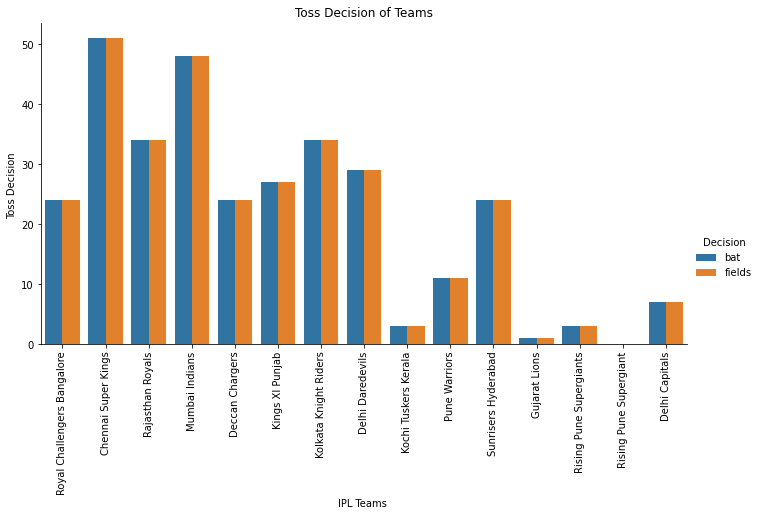

In [32]:
sns.catplot(x= "Toss Winner" , y = 'Times' , hue= "Decision" , data = decision_making, kind= 'bar', height= 5, aspect= 2 )

plt.xticks(rotation = 90)
plt.title("Toss Decision of Teams")
plt.xlabel("IPL Teams ")
plt.ylabel("Toss Decision ")
plt.show()

### Famous Venue

Text(0, 0.5, 'Venue')

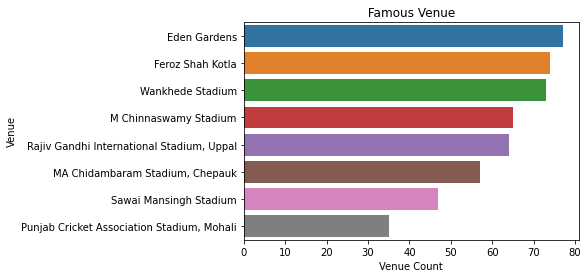

In [33]:
sns.barplot(x = data['venue'].value_counts().head(8).values,
           y = data['venue'].value_counts().head(8).index,
            data = data 
           )

plt.title(" Famous Venue ")
plt.xlabel("Venue Count")
plt.ylabel("Venue")

### Top 5 Umpire_1

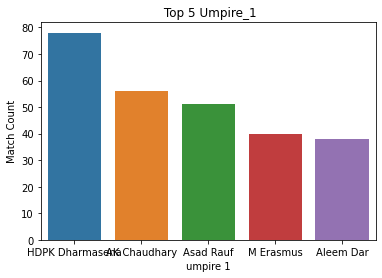

In [36]:
sns.barplot(x = data['umpire1'].value_counts().head().index,
            y = data['umpire1'].value_counts().head().values,
           data = data
           )
plt.xlabel("umpire 1")
plt.ylabel("Match Count")
plt.title(" Top 5 Umpire_1")
plt.show()

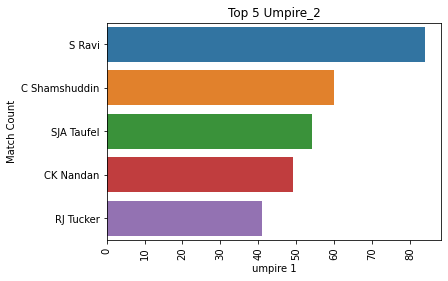

In [38]:
sns.barplot(x = data['umpire2'].value_counts().head().values,
            y = data['umpire2'].value_counts().head().index,
           data = data
           )
plt.xticks(rotation = 90)
plt.xlabel("umpire 1")
plt.ylabel("Match Count")
plt.title("Top 5 Umpire_2")
plt.show()